In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df_market_data)

# Scale the data
scaled_data = scaler.transform(df_market_data)



In [ ]:
# Create a DataFrame with the scaled data, including the coin_id index
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    index=df_market_data.index,
    columns=df_market_data.columns
)

# Display the scaled DataFrame
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [17]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [18]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

In [20]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [22]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values,
    width=800,
    height=400
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k
k = 4

model = KMeans(n_clusters=k, random_state=0)


In [24]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [25]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [ ]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_predictions = df_market_data_scaled.copy()


In [27]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_predictions["CoinCluster"] = predictions

# Display the copy of the scaled DataFrame
df_market_data_scaled_predictions.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CoinCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [28]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_data_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CoinCluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    width=800,
    height=400
)

:NdOverlay   [CoinCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [31]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_features = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
pca_features_df = pd.DataFrame(
    data=pca_features,
    columns=["principal_component_1", "principal_component_2", "principal_component_3"],
    index=df_market_data_scaled.index
)

In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_



#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [47]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    data=pca_features,
    index=df_market_data_scaled.index,
    columns=["principal_component_1", "principal_component_2", "principal_component_3"]
)


# Display the scaled PCA DataFrame
pca_df.head(10)

,principal_component_1,principal_component_2,principal_component_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [48]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [49]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pca_df)
    inertia.append(model.inertia_)

In [50]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [46]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values,
    width=1000,
    height=600
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**

The best value for `k` is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

yes, 3 != 4 (lol)

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k
k = 4

In [ ]:
# Fit the K-Means model using the PCA data
model = KMeans(n_clusters=k, random_state=0)
model.fit(pca_df)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predictions = model.predict(pca_df)

# Print the resulting array of cluster values.
print(predictions)


In [37]:
# Create a copy of the scaled PCA DataFrame
pca_df_predictions = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_predictions["CoinCluster"] = predictions

# Display the copy of the scaled PCA DataFrame
pca_df_predictions.head(10)

,principal_component_1,principal_component_2,principal_component_3,CoinCluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [45]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_df_predictions.hvplot.scatter(
    x="principal_component_1",
    y="principal_component_2",
    by="CoinCluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    width=1000,
    height=600
)

:NdOverlay   [CoinCluster]
   :Scatter   [principal_component_1]   (principal_component_2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

(1.0, 11.0)

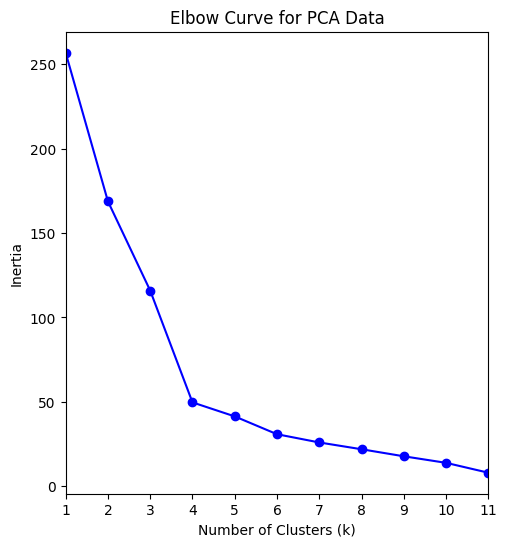

In [44]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the first subplot for the Elbow curve using PCA data
plt.subplot(1, 2, 1)

# Plot the Elbow curve for PCA data
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', color='blue')
plt.title("Elbow Curve for PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(df_elbow["k"])
plt.xlim(1, 11)




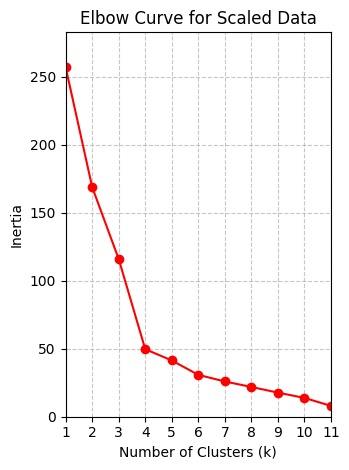

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Create the second subplot for the Elbow curve using scaled data
plt.subplot(1, 2, 2)
# Plot the Elbow curve for scaled data
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', color='red')
plt.title("Elbow Curve for Scaled Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(df_elbow["k"])
plt.xlim(1, 11)
plt.ylim(0, max(df_elbow["inertia"]) * 1.1)

# Grid the plots
plt.grid(True, linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

##### https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
The clustering process is much more efficient when using PCA. The clusters are more obvious.